# Converting the data from COCO to YOLO format

In [142]:
import json
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import re

In [143]:
input_path = "datasets/yolo_dataset"
output_path = "datasets/yolo_dataset/"

In [144]:

# Open and read the JSON file
with open('datasets\coco_dataset\\annotations_coco.json', 'r') as file:
    data = json.load(file)

In [145]:
# functions 

def get_img_names(folder_path):
  jpg_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
  return jpg_files


def get_img_ann(image_id):
    img_ann = []
    isFound = False
    for ann in data['annotations']:
        if ann['image_id'] == image_id:
            img_ann.append(ann)
            isFound = True
    if isFound:
        return img_ann
    else:
        return None
    

def get_img(filename):
  for img in data['images']:
    if img['file_name'] == filename:
      return img

In [146]:
# getting the names of the file
path_coco_img = "datasets\yolo_dataset\images"
file_names = get_img_names(path_coco_img)

file_names = sorted(file_names, key=lambda x: int(re.search(r'(\d+)', x).group()))
file_names

['img1.jpg',
 'img2.jpg',
 'img3.jpg',
 'img4.jpg',
 'img5.jpg',
 'img6.jpg',
 'img7.jpg',
 'img8.jpg',
 'img9.jpg',
 'img10.jpg',
 'img11.jpg',
 'img12.jpg',
 'img13.jpg',
 'img14.jpg',
 'img15.jpg',
 'img16.jpg',
 'img17.jpg',
 'img18.jpg',
 'img19.jpg',
 'img20.jpg',
 'img21.jpg',
 'img22.jpg',
 'img23.jpg',
 'img24.jpg',
 'img25.jpg',
 'img26.jpg',
 'img27.jpg',
 'img28.jpg',
 'img29.jpg',
 'img30.jpg',
 'img31.jpg',
 'img32.jpg',
 'img33.jpg',
 'img34.jpg',
 'img35.jpg',
 'img36.jpg',
 'img37.jpg',
 'img38.jpg',
 'img39.jpg',
 'img40.jpg',
 'img41.jpg',
 'img42.jpg',
 'img43.jpg',
 'img44.jpg',
 'img45.jpg',
 'img46.jpg',
 'img47.jpg',
 'img48.jpg',
 'img49.jpg',
 'img50.jpg',
 'img51.jpg',
 'img52.jpg',
 'img53.jpg',
 'img54.jpg',
 'img55.jpg',
 'img56.jpg',
 'img57.jpg',
 'img58.jpg',
 'img59.jpg',
 'img60.jpg',
 'img61.jpg',
 'img62.jpg',
 'img63.jpg',
 'img64.jpg',
 'img65.jpg',
 'img66.jpg',
 'img67.jpg',
 'img68.jpg',
 'img69.jpg',
 'img70.jpg',
 'img71.jpg',
 'img72.jpg',
 

In [147]:

count = 1

for filename in file_names:
  # Extracting image 
  img = get_img(filename)
  img_id = img['id']
  img_w = img['width']
  img_h = img['height']

  # Get Annotations for this image
  img_ann = get_img_ann(img_id)

  if img_ann:
    # Opening file for current image
    file_object = open(f"{output_path}labels/img{count}.txt", "a")

    for ann in img_ann:
      current_category = ann['category_id'] - 1 # As yolo format labels start from 0 
      current_bbox = ann['bbox']
      x = current_bbox[0]
      y = current_bbox[1]
      w = current_bbox[2]
      h = current_bbox[3]
      
      # Finding midpoints
      x_centre = (x + (x+w))/2
      y_centre = (y + (y+h))/2
      
      # Normalization
      x_centre = x_centre / img_w
      y_centre = y_centre / img_h
      w = w / img_w
      h = h / img_h
      
      # Limiting upto fix number of decimal places
      x_centre = format(x_centre, '.6f')
      y_centre = format(y_centre, '.6f')
      w = format(w, '.6f')
      h = format(h, '.6f')
          
      # Writing current object 
      file_object.write(f"{current_category} {x_centre} {y_centre} {w} {h}\n")

    file_object.close()
    count += 1  # This should be outside the if img_ann block.

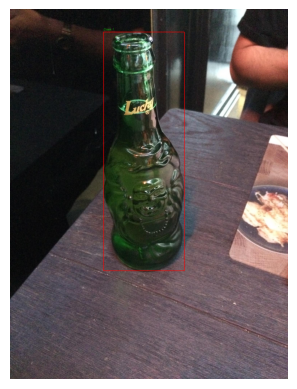

In [ ]:


# Function to load and draw YOLO annotations on an image
def visualize_yolo_image(image_path, annotation_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

    # Read the YOLO annotations
    with open(annotation_path, 'r') as file:
        annotations = file.readlines()

    # Get image dimensions
    image_height, image_width, _ = image.shape

    # Draw each bounding box from the annotations
    for annotation in annotations:
        parts = annotation.strip().split()

        class_id = int(parts[0])
        center_x = float(parts[1]) * image_width
        center_y = float(parts[2]) * image_height
        width = float(parts[3]) * image_width
        height = float(parts[4]) * image_height

        # Convert center_x, center_y, width, height to top-left and bottom-right coordinates
        top_left_x = int(center_x - width / 2)
        top_left_y = int(center_y - height / 2)
        bottom_right_x = int(center_x + width / 2)
        bottom_right_y = int(center_y + height / 2)

        # Draw rectangle (bounding box) on the image
        image = cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (255, 0, 0), 2)

        # Optionally, draw class label (if you have a list of class names)
        label = f'Class {class_id}'
        image = cv2.putText(image, label, (top_left_x, top_left_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Display the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage
image_dir = 'datasets\\yolo_dataset\\images'  # Replace with your dataset directory
annotation_dir = 'datasets\\yolo_dataset\\labels'
image_name = 'img1.jpg'  # Replace with your image file name
annotation_name = 'img1.txt'  # Replace with your annotation file name

# Get the full paths to the image and annotation file
image_path = os.path.join(image_dir, image_name)
annotation_path = os.path.join(annotation_dir, annotation_name)

# Call the function to visualize the image with annotations
visualize_yolo_image(image_path, annotation_path)
